In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
data = pd.read_csv("C:/Users/navod/Downloads/WineQT.csv")

In [7]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [9]:
X = data.iloc[:, :2].values
y = (data["quality"] >= 6).astype(int).values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)
     

LogisticRegression()

In [15]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [17]:
print("Accuracy:", accuracy)
print("Accuracy %:", accuracy * 100)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.6419213973799127
Accuracy %: 64.19213973799127
Confusion Matrix:
 [[54 48]
 [34 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.53      0.57       102
           1       0.66      0.73      0.69       127

    accuracy                           0.64       229
   macro avg       0.64      0.63      0.63       229
weighted avg       0.64      0.64      0.64       229



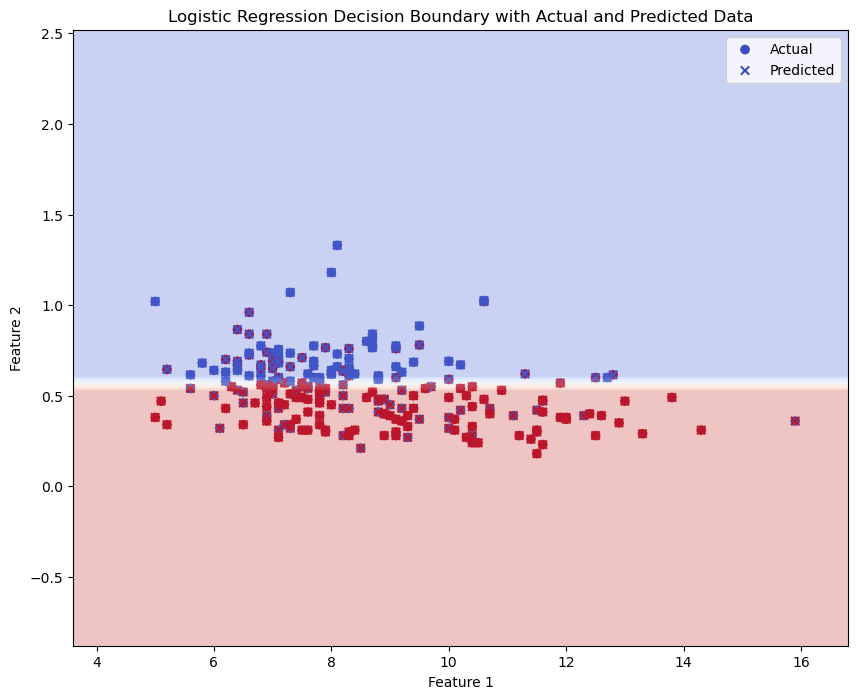

In [19]:
plt.figure(figsize=(10, 8))

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='o', label='Actual')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='x', label='Predicted')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(['Actual', 'Predicted'])
plt.title("Logistic Regression Decision Boundary with Actual and Predicted Data")
plt.show()